# SALARIES EDA: Rishika

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('salaries.csv')

C:\Users\ypanw\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [4]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [5]:
print(df.isnull().any())

Id                  False
EmployeeName        False
JobTitle            False
BasePay              True
OvertimePay         False
OtherPay            False
Benefits             True
TotalPay            False
TotalPayBenefits    False
Year                False
Notes                True
Agency              False
Status               True
dtype: bool


In [6]:
#columns basepay, benefits, notes and status have null values
df.drop(columns=['Status', 'Notes'],inplace=True)


In [7]:
df['BasePay']=df['BasePay'].replace('Not Provided', 0)
df['OvertimePay']= df['OvertimePay'].replace('Not Provided', 0)
df['OtherPay']= df['OtherPay'].replace('Not Provided', 0)

In [8]:
#We removed the rows where the numeric values were null since it would affect our mean salary

# TOTAL SALARY ANALYSIS

In [9]:
df.TotalPay.mean()

74768.321971703

C:\Users\ypanw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Maximum salary per year')

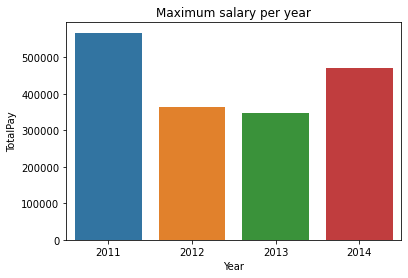

In [93]:
y=df.groupby('Year').TotalPay.max()
sns.barplot(y.index,y)
plt.title('Maximum salary per year')

In [12]:
#Relation bw basepay and total pay
df.TotalPay.std()

50517.005273949944

In [13]:
df.BasePay= df.BasePay.astype('float')

In [14]:
df.BasePay.mean()

66323.65685410085

In [15]:
df[['BasePay','TotalPay']].corr()

,BasePay,TotalPay
BasePay,1.000000,0.954496
TotalPay,0.954496,1.000000


Text(0, 0.5, 'totalpay')

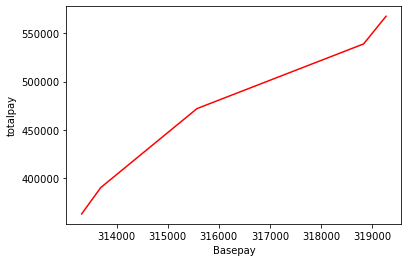

In [16]:
x=df.BasePay.nlargest(n=5)
plt.plot(x,y,color='red')
plt.xlabel('Basepay')
plt.ylabel('totalpay')
#how totalpay and basepay varies 

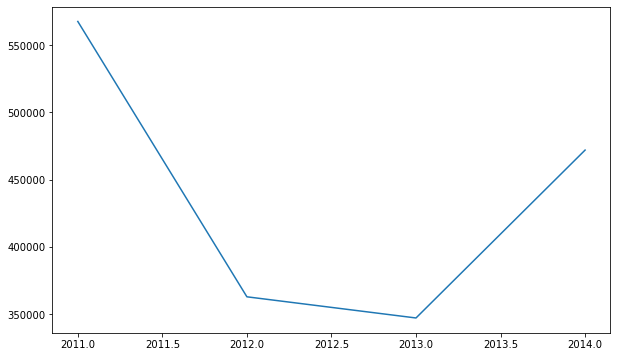

In [39]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.plot( y.index,y)
#Maximum salary per year

In [19]:
#From the trends, we can observe that the Basepay and TotalPay were the max in the year 2013

C:\Users\ypanw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


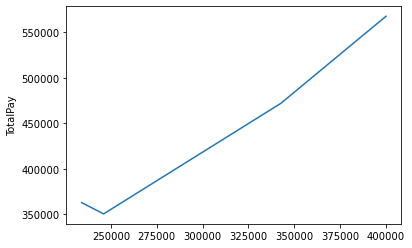

In [55]:
perks= df['OvertimePay'].astype('float')+ df['OtherPay'].astype('float')
a=perks.nlargest(n=10)
a
sns.lineplot(a, df.TotalPay.nlargest(n=10))
#How perks vary with total pay  
#Linear Relation with perks and total pay

# SALARY ACCORDING TO JOB TITLE ANALYSIS

In [56]:
#No of unique jobs:
df.JobTitle.nunique()

2159

([<matplotlib.patches.Wedge at 0x289779c2640>,
 [Text(0.4992363156556431, 0.9801852381721422, 'Transit Operator'),
  Text(-1.064103534690284, 0.27871789942456804, 'Special Nurse'),
  Text(-0.58154969539069, -0.9337022822029493, 'Registered Nurse'),
  Text(0.44898044598645726, -1.0041994618211076, 'Public Svc Aide-Public Works'),
  Text(1.0221835222545301, -0.40637525371425176, 'Police Officer 3')])

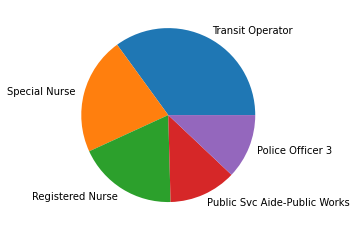

In [79]:
#Jobs where the max no of employees work
x=df['JobTitle'].value_counts().nlargest(n=5)
plt.pie(x, labels=x.index)

In [147]:
# jobs with maximun salary:
y=df.groupby('JobTitle')['TotalPay'].max().head()

C:\Users\ypanw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobTitle', ylabel='TotalPay'>

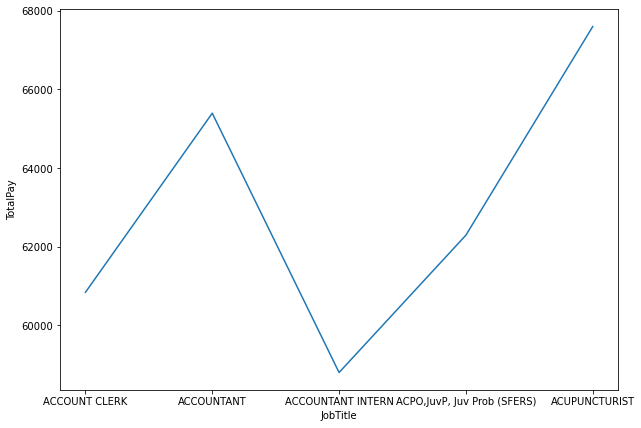

In [148]:
plt.figure(figsize=(10,7))
sns.lineplot(y.index, y)

C:\Users\ypanw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'highest paying job profiles')

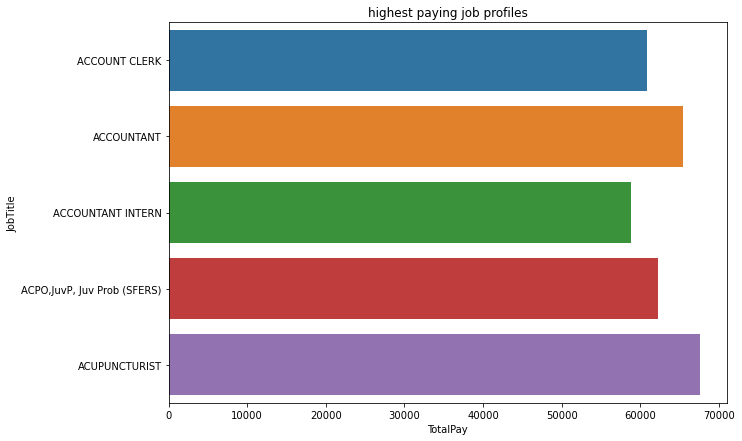

In [149]:
plt.figure(figsize=(10,7))

sns.barplot(y,y.index)
plt.title('highest paying job profiles')

In [136]:
#lowest paying jobs:
ds=df.groupby('JobTitle')['TotalPay'].min()
subset= ds[(ds.values>0)]
y=subset.nsmallest(n=10)

C:\Users\ypanw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'job profiles with lowest salary')

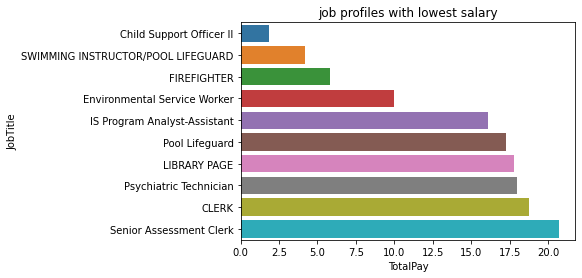

In [144]:
sns.barplot(y, y.index)
plt.title('job profiles with lowest salary')